# An Improved KNN Based on Class Contribution and Feature Weighting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import operator

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from statistics import mean
from collections import defaultdict

In [2]:
#fungsi buat dapetin jarak eucledian
#data1 = data pertama
#data2 = data pembanding
#length = jumlah variabel yang dibandingkan
def eucledianDistance(data1, data2, length, weight=[1,1,1,1,1,1,1,1,1,1,1,1]):
    distance = 0
    for x in range(length):
        distance += (weight[x]*pow((float(data1[x]) - float(data2[x])), 2))
        # print(str(data1) + "-" + str(data2) + ": " + str(distance))
    return math.sqrt(distance)

In [3]:
#fungsi untuk mendapatkan tetangga terdekat
#trainingset = data training / ground truth
#testdata = data testing / data yang diuji
#k = tetangga
def getNeighbors(trainingSet, testData, testClass, k):
    #array distance untuk nyimpan jarak, nanti akan disort yang tedekat
    # print(len(testData))
    distance = []
    length = len(testData) - 1
    for x in range(len(trainingSet)):
        dist = eucledianDistance(testData, trainingSet[x], length)
        distance.append((trainingSet[x], testClass[x], dist))
        # print((trainingSet[x], dist))
    distance.sort(key=operator.itemgetter(2))
    # print(distance)
    neighbors = []
    for x in range(k):
        #habis disort, data tetangga terdekat disimpan di array neighbors
        neighbors.append(distance[x][0:2])
    # print(neighbors)
    return neighbors

In [4]:
#fungsi getResponse buat nyari datatest masuk kelas mana / voting kelasnya
def getResponse(neighbors):
    #classvote disiapin buat penampung proses voting kelas
    classVote = {}
    # print(neighbors)
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        # print(response)
        if response in classVote:
            classVote[response] += 1
        else:
            classVote[response] = 1
    # print(classVote)
    # sortedVotes buat milih vote kelas terbanyak
    sortedVotes = sorted(classVote.items(), key=operator.itemgetter(1), reverse=True)
    # print(sortedVotes[0][0])
    return sortedVotes[0][0]

In [5]:
#fungsi getAccuracy untuk mendapatkan nilai akurasi
#testData adalah kelas dari data yang dicek
#prediction adalah prediksi kelas dari data yang dicek
def getAccuracy(testData, predictions):
    correct = 0
#     print(len(testData))
#     print(len(predictions))
    for x in range(len(testData)):
        #jika prediksi benar, maka nilai correct bertambah +1
        if testData[x] == predictions[x]:
            correct += 1
    #mengembalikan nilai return persentase
#    print(correct)
    return (correct/float(len(testData)))

In [6]:
#fungsi getKFold untuk melakukan operasi K-Fold dan return accuracy
def getKFold(dataX, dataY, numberofK, numberofNeighbour):    
    prediction = []
    fold = 1
    KF_xtrain = []
    KF_xtest = []
    KF_ytrain = []
    KF_ytest = []
    knn_result = []
    kfold = KFold(n_splits=numberofK, shuffle=True, random_state=True)
    for train, test in kfold.split(dataX, dataY):
        # print('train: %s, test: %s' % (X[train], X[test]))
        KF_xtrain.append(dataX[train])
        KF_xtest.append(dataX[test])
        KF_ytrain.append(dataY[train])
        KF_ytest.append(dataY[test])
        for j in range(len(KF_xtest[0])):
            neighbors = getNeighbors(KF_xtrain[0], KF_xtest[0][j], KF_ytrain[0], numberofNeighbour)
            result = getResponse(neighbors)
            prediction.append(result)
            neighbors.clear()
        accuracy = getAccuracy(KF_ytest[0], prediction)
        knn_result.append(accuracy)
        prediction.clear()
        # print(y_test)
        # print(prediction)
        fold += 1
        KF_xtest.clear()
        KF_xtrain.clear()
        KF_ytest.clear()
        KF_ytrain.clear()
    print('K = ' + str(numberofK) + ' Neighbour = ' + str(numberofNeighbour)+ ' Accuracy: ' + str(mean(knn_result)))
    return mean(knn_result)
    

In [7]:
#Load dataset
path = "dataset/iris.data"
# path = "dataset/transfusion.data"
# path = "dataset/bupa.data"

In [8]:
namesIris = [
    'sepal-length',
    'sepal-width',
    'petal-width',
    'petal-length',
    'class'
]

nameTransfusion = [
    'Recency',
    'Frequency',
    'Monetary',
    'Time',
    'Yes/No Donate'
]

nameBupa = [
    'mcv',
    'alkphos',
    'sgpt',
    'sgot',
    'gammagt',
    'drinks',
    'selector'
]

## Iris Dataset

In [9]:
dataset = pd.read_csv(path, header=None)
print(len(dataset))

150


In [10]:
##Dataset preprocessing
#membagi jadi 2, X untuk nilai numerik, Y untuk nama kelas
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
Z_0 = np.delete(X, 0, 1)
Z_1 = np.delete(X, 1, 1)
Z_2 = np.delete(X, 2, 1)
Z_3 = np.delete(X, 3, 1)
#print(X)
#print(Z)

### DCT-KNN Step

In [11]:
# 1. Delete one feature
# pret is the sum average accuracy of
# the traditional kNN algorithm in the original dataset when
# the value of k is 3,5 and 7 on the condition of 5-folder cross
# validation, and the prei is the similar sum of the traditional
# kNN algorithm on the data lacking the i-th feature.
normal_KNN_result = []
lack_feature_result = defaultdict(list)
z = {}

for N in (3, 5, 7):
    normal_KNN_result.append(getKFold(X, Y, numberofK=5, numberofNeighbour=N))
    for k in range (4):
        lack_feature_result[k].append(getKFold(locals()["Z_" + str(k)], Y, numberofK=5, numberofNeighbour=N))
        
# print(normal_KNN_result)
# for k in range (4):
#     print(lack_feature_result[k])

K = 5 Neighbour = 3 Accuracy: 0.9466666666666667
K = 5 Neighbour = 3 Accuracy: 0.9400000000000001
K = 5 Neighbour = 3 Accuracy: 0.9666666666666667
K = 5 Neighbour = 3 Accuracy: 0.72
K = 5 Neighbour = 3 Accuracy: 0.72
K = 5 Neighbour = 5 Accuracy: 0.9400000000000001
K = 5 Neighbour = 5 Accuracy: 0.9400000000000001
K = 5 Neighbour = 5 Accuracy: 0.9400000000000001
K = 5 Neighbour = 5 Accuracy: 0.76
K = 5 Neighbour = 5 Accuracy: 0.76
K = 5 Neighbour = 7 Accuracy: 0.9400000000000001
K = 5 Neighbour = 7 Accuracy: 0.9533333333333334
K = 5 Neighbour = 7 Accuracy: 0.9466666666666667
K = 5 Neighbour = 7 Accuracy: 0.74
K = 5 Neighbour = 7 Accuracy: 0.74


In [12]:
disc = []
for i in range (4):
    disc.append((1-(sum(lack_feature_result[i]) - sum(normal_KNN_result))))
# print(disc)
normalized_disc = []
for i in range (4):
    normalized_disc.append((disc[i]/sum(disc)))
print(normalized_disc)

[0.19176319176319173, 0.18790218790218788, 0.31016731016731025, 0.31016731016731025]


In [13]:
#5 Fold
K_5_result = []
for N in range (1,11):
    K_5_result.append(getKFold(X, Y, numberofK=5, numberofNeighbour=N))


K = 5 Neighbour = 1 Accuracy: 0.92
K = 5 Neighbour = 2 Accuracy: 0.92
K = 5 Neighbour = 3 Accuracy: 0.9466666666666667
K = 5 Neighbour = 4 Accuracy: 0.9400000000000001
K = 5 Neighbour = 5 Accuracy: 0.9400000000000001
K = 5 Neighbour = 6 Accuracy: 0.9466666666666667
K = 5 Neighbour = 7 Accuracy: 0.9400000000000001
K = 5 Neighbour = 8 Accuracy: 0.9533333333333334
K = 5 Neighbour = 9 Accuracy: 0.9533333333333334
K = 5 Neighbour = 10 Accuracy: 0.9466666666666667


In [14]:
#10 Fold

K_10_result = []
for N in range (1,11):
    K_10_result.append(getKFold(X, Y, numberofK=10, numberofNeighbour=N))

K = 10 Neighbour = 1 Accuracy: 0.92
K = 10 Neighbour = 2 Accuracy: 0.92
K = 10 Neighbour = 3 Accuracy: 0.9466666666666667
K = 10 Neighbour = 4 Accuracy: 0.9333333333333333
K = 10 Neighbour = 5 Accuracy: 0.9466666666666667
K = 10 Neighbour = 6 Accuracy: 0.9400000000000001
K = 10 Neighbour = 7 Accuracy: 0.9333333333333333
K = 10 Neighbour = 8 Accuracy: 0.9466666666666667
K = 10 Neighbour = 9 Accuracy: 0.9466666666666667
K = 10 Neighbour = 10 Accuracy: 0.9466666666666667


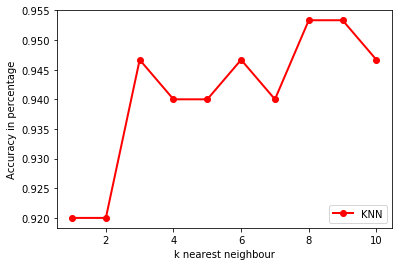

In [15]:
plt.plot([1,2,3,4,5,6,7,8,9,10],K_5_result,'-ro', label="KNN", linewidth=2.0)
plt.legend(loc='lower right')
plt.xlabel('k nearest neighbour')
plt.ylabel('Accuracy in percentage')
plt.show()

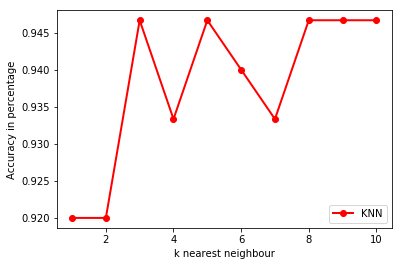

In [16]:
plt.plot([1,2,3,4,5,6,7,8,9,10],K_10_result,'-ro', label="KNN", linewidth=2.0)
plt.legend(loc='lower right')
plt.xlabel('k nearest neighbour')
plt.ylabel('Accuracy in percentage')
plt.show()